In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, datasets, models
import matplotlib.pyplot as plt

In [42]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [19]:
print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (50000, 32, 32, 3)
x_test (10000, 32, 32, 3)
y_train (50000, 1)
y_test (10000, 1)


In [24]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

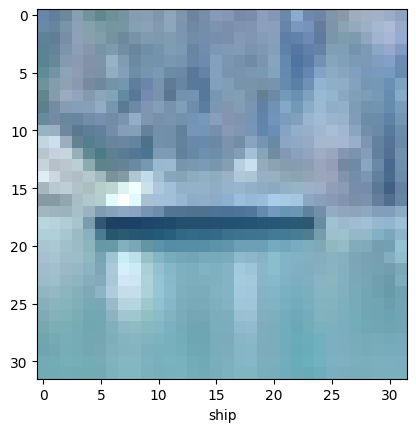

In [34]:
%matplotlib inline
id = 456
try:
  plt.xlabel(classes[y_train[id]])
except:
  plt.xlabel(classes[y_train[id][0]])
plt.imshow(x_train[id])


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
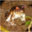

In [13]:
x_train[0]

In [45]:
# resize np
x_train = x_train / 225.0
x_test = x_test / 255.0

y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [46]:
x_train[0]

array([[[0.26222222, 0.27555556, 0.28      ],
        [0.19111111, 0.20444444, 0.2       ],
        [0.22222222, 0.21333333, 0.19111111],
        ...,
        [0.70222222, 0.58666667, 0.48      ],
        [0.67555556, 0.55555556, 0.45333333],
        [0.65777778, 0.55111111, 0.45777778]],

       [[0.07111111, 0.08888889, 0.08888889],
        [0.        , 0.        , 0.        ],
        [0.08      , 0.03555556, 0.        ],
        ...,
        [0.54666667, 0.39111111, 0.24444444],
        [0.52888889, 0.36888889, 0.22222222],
        [0.54222222, 0.38666667, 0.25333333]],

       [[0.11111111, 0.10666667, 0.09333333],
        [0.07111111, 0.03111111, 0.        ],
        [0.21777778, 0.12      , 0.03555556],
        ...,
        [0.52444444, 0.37333333, 0.22222222],
        [0.53333333, 0.37333333, 0.22222222],
        [0.48444444, 0.32444444, 0.18666667]],

       ...,

       [[0.92444444, 0.75555556, 0.42666667],
        [0.89333333, 0.68      , 0.15111111],
        [0.88      , 0

In [119]:
model = models.Sequential([
    # CNN
    layers.Conv2D(filters=32,input_shape=(32,32,3),kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(filters=64,input_shape=(32,32,3),kernel_size=(4,4),activation='relu'),
    layers.MaxPooling2D(2,2),

    # Dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train,y_train,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 8s 4ms/step - loss: 1.4516 - accuracy: 0.4791
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0785 - accuracy: 0.6220
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9507 - accuracy: 0.6671
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8732 - accuracy: 0.6946
Epoch 5/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8137 - accuracy: 0.7191
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7599 - accuracy: 0.7389
Epoch 7/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7157 - accuracy: 0.7518
Epoch 8/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6723 - accuracy: 0.7659
Epoch 9/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6375 - accuracy: 0.7783
Epoch 10/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.599

In [120]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.2517 - accuracy: 0.6890


[1.2516733407974243, 0.6890000104904175]

In [70]:
print("single : ",x_test[0].shape)
print("all : ",x_test.shape)

single :  (32, 32, 3)
all :  (10000, 32, 32, 3)


In [121]:
pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [122]:
b

[3, 8, 1, 0, 6]

In [123]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [130]:
! wget https://t3.ftcdn.net/jpg/00/01/47/28/360_F_1472821_kMjcU0El8NkcU0k7zNtlVTU0Fl8W2l.jpg -O airplane.jpg
! wget https://www.hindustantimes.com/ht-img/img/2023/08/25/1600x900/international_dog_day_1692974397743_1692974414085.jpg -O dog.jpg
! wget https://imgd.aeplcdn.com/370x208/n/cw/ec/130591/fronx-exterior-right-front-three-quarter-109.jpeg -O car.jpg

--2024-05-04 12:40:49--  https://t3.ftcdn.net/jpg/00/01/47/28/360_F_1472821_kMjcU0El8NkcU0k7zNtlVTU0Fl8W2l.jpg
Resolving t3.ftcdn.net (t3.ftcdn.net)... 151.101.1.167, 151.101.65.167, 151.101.129.167, ...
Connecting to t3.ftcdn.net (t3.ftcdn.net)|151.101.1.167|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41486 (41K) [image/jpeg]
Saving to: ‘airplane.jpg’

airplane.jpg        100%[===================>]  40.51K  --.-KB/s    in 0.006s  

2024-05-04 12:40:49 (6.16 MB/s) - ‘airplane.jpg’ saved [41486/41486]

--2024-05-04 12:40:49--  https://www.hindustantimes.com/ht-img/img/2023/08/25/1600x900/international_dog_day_1692974397743_1692974414085.jpg
Resolving www.hindustantimes.com (www.hindustantimes.com)... 104.114.76.195, 104.114.76.177, 2600:1406:4e00:4::17d9:76ad, ...
Connecting to www.hindustantimes.com (www.hindustantimes.com)|104.114.76.195|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘dog.jpg’

In [131]:
# ! wget https://media.zigcdn.com/media/model/2021/May/v8_360x240.jpg
import cv2
images = ['airplane.jpg','dog.jpg','car.jpg']
imgList = []

for image in images:
  img = cv2.imread(image)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img,(32,32))
  imgList.append(img)

In [133]:
imgList = np.array(imgList)

In [134]:
imgList.shape

(3, 32, 32, 3)

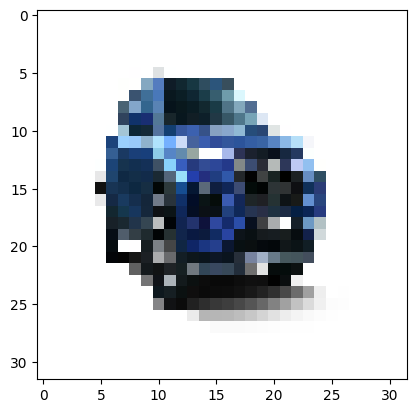

In [138]:
%matplotlib inline
plt.imshow(imgList[2])

In [141]:
pred = model.predict(imgList)
max_lst = [np.argmax(elem) for elem in pred[:5]]

print(max_lst)
for x in max_lst:
  print(classes[x])

1/1 [==============================] - 0s 18ms/step
[0, 5, 0]
airplane
dog
airplane
